# Pareto Plot?
I have spent a good amount of time taking online classes and reading books around Machine Learning, Data Science and Visualizations and have never heard of this plot before. I found it while looking around at Interview questions for a Data Analyst role and it would be a shame to have lost a job to not knowing this. Again though, I am not a stranger to this kind of content and **have never ever seen this plot before** discussed.

Looking around at some of the cheat sheets, it does not even exist. In this cheatsheet, the closest is the **Column + line timeline** [here](https://raw.githubusercontent.com/ft-interactive/chart-doctor/master/visual-vocabulary/poster.png). And, if you search it by name in the r-charts site it also doesn't exist:
![](images/2022-12-15/r-charts-no-pareto.png)

# So, What is This?
So, the **Pareto  Plot** is a plot which attempts to visualize which factor among a set of categories has the most impact mixing a Bar Chart and a Cumulative Sum Chart. There is no default plot for this in matplotlib nor for seaborn so it wil have to be made itself. In practice, this is just two graphs on the same plot using the same data so it's not too hard to solve.

In [5]:
#| include: false
import matplotlib.pyplot as plt
from faker import Faker
import pandas as pd
import random

fake = Faker()

The good news is that this has already been solved thanks to this wonderful gentleman [Tyler Marrs](https://tylermarrs.com/posts/pareto-plot-with-matplotlib/). So, we'll use his code - and take it apart and explain why it works, I might add - in a play example. And no, we're not going to be using his example since I honestly do not find it believable.

We're going to pretend that we are a Non-Profit that invests money in a bunch of different kinds of companies. And, we're worried about what our legal obligations are so we've cleaned the data so that we can only see the type of business it is along with the actual amount of investments. So, we'll make some pretend data with the `Faker` package.

In [6]:
# fake compay type and fake investments.
company = [ fake.company_suffix() for _ in range(100)]
investments = [ random.randint(1,10) for _ in range(100)]

If you ask me this question normally, I would simply use a group by along some kind of aggregation function like this:

In [28]:
data = pd.DataFrame({'company':company, 'investments':investments})
sumData = data.groupby('company').sum().reset_index().sort_values('investments', ascending=False)
sumData

,company,investments
3,Ltd,127
0,Group,117
5,and Sons,108
4,PLC,95
2,LLC,72
1,Inc,63


For me - and I would expect most people - this would work fine since this is what was asked for. But, someone is going to apparently ask me to give them the results as one of these Pareto Plots. Let's look through Tyler's code here and figure out what he's done step by step.

In [ ]:
xlabel = x
ylabel = y
tmp = df.sort_values(y, ascending=False)
x = tmp[x].values
y = tmp[y].values
weights = y / y.sum()
cumsum = weights.cumsum()

Ok, so first we'll grab the names of the columns create a new data frame by sorting the `y` column descending. Then the values are extracted from both columns for later use. Next, the percentage is calculated by broadcasting the sum of values to divide by all of them. Then, the cumulative sum of all of percentages is added up.

In [ ]:
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

Next, a subplot is created at the bar graph is attached on one of the axis followed by labelling the X and Y axis labels.

In [ ]:
ax2 = ax1.twinx()
ax2.plot(x, cumsum, '-ro', alpha=0.5)
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')

I had never seen the `twinx()` function before but my guess would of been that it was to share the first axis for the second subplot. And, that looks to be correct: `The twinx() function in pyplot module of matplotlib library is used to make and return a second axes that shares the x-axis.` The `-ro` is what is setting the red circle at each point; this is something from matplotlib I had to look up. The Y label is blanked and the colors are set to red.

In [ ]:
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

The values from the the Y Axis are pulled and then their format is corrected/updated. That is a really nice touch.

In [ ]:
# hide y-labels on right side
if not show_pct_y:
    ax2.set_yticks([])

formatted_weights = [pct_format.format(x) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')   

There is a default argument to suppress the Y axis ticks - which I have kept as default. Then the percentage numbers are added to each of the points before they are displayed.

In [29]:
#| include: false
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_93175/2774039726.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


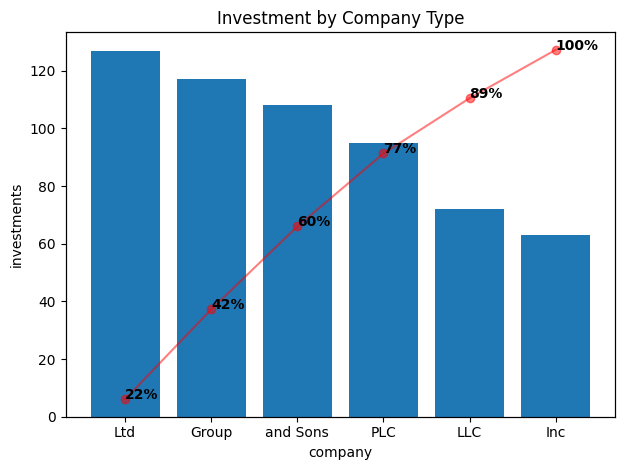

In [32]:
#| warning: false
pareto_plot(sumData, x='company', y='investments', title='Investment by Company Type')

There we go! The `Ltd` business type is where we're investing most of our money. I have to admit that I don't find this chart very useful at all. Looking around, it appears that it is commonly used for helping visualize malfunctions in a manufacturing context. Maybe if there were 20 of these categories then I could perhaps see a use but I'm not well convinced of this. <br />
Anyways, that's all there is to the **Pareto Plot**.